In [1]:
!pip install pandas natasha pymystem3 ipymarkup nltk

In [2]:
import pandas as pd
import pymystem3
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN

from natasha import (
    Segmenter,
    MorphVocab,

    NewsEmbedding,
    NewsMorphTagger,
    NewsSyntaxParser,
    NewsNERTagger,

    PER,
    NamesExtractor,

    Doc
)
from ipymarkup import show_dep_ascii_markup as show_markup
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

## –†–∞–±–æ—Ç–∞ —Å –¥–∞–Ω–Ω—ã–º–∏

–°–ø–∞—Ä—à–µ–Ω–Ω—ã–π —Å–∞–π—Ç: [Lenta.ru](https://lenta.ru/)

–ü–∞—Ä—Å–µ—Ä: PR_NLP1-parser.py

In [3]:
# –ó–∞–≥—Ä—É–∂–∞–µ–º –¥–∞–Ω–Ω—ã–µ
df = pd.read_csv('articles.csv', sep='\t')

# –£–¥–∞–ª—è–µ–º –ª–∏—à–Ω–∏–µ —Å—Ç–æ–ª–±—Ü—ã
morph_df = df.drop(["Unnamed: 0", "created_date"], axis=1)
morph_df

title  \
0                             –í –†–æ—Å—Å–∏–∏ –ø–æ–≤—ã—Å–∏–ª–∏ –∑–∞—Ä–ø–ª–∞—Ç—ã   
1      –ü–∞—Ä—Ç–∏—è –ü–æ—Ä–æ—à–µ–Ω–∫–æ –ø–æ—Ç—Ä–µ–±–æ–≤–∞–ª–∞ –∑–∞–ø—Ä–µ—Ç–∏—Ç—å –ø–æ—Å—Ç–∞–≤–∫...   
2      –í –†–æ—Å—Å–∏–∏ –ø–æ–¥–æ—Ä–æ–∂–∞–ª–∏ –∞–ª–∫–æ–≥–æ–ª—å–Ω—ã–µ –Ω–∞–ø–∏—Ç–∫–∏ –∏ —Å–∏–≥–∞...   
3      –†–æ–≥–æ–∑–∏–Ω –Ω–∞–∑–≤–∞–ª –ø–æ–∫–ª–æ–Ω–Ω–∏–∫–æ–≤ –ú–∞—Å–∫–∞ ¬´–°–≤–∏–¥–µ—Ç–µ–ª—è–º–∏ ...   
4      –í –†–æ—Å—Å–∏–∏ –∏–∑–º–µ–Ω–∏–ª–∏—Å—å –ø—Ä–∞–≤–∏–ª–∞ —Ä–µ–≥–∏—Å—Ç—Ä–∞—Ü–∏–∏ –Ω–æ–≤—ã—Ö ...   
...                                                  ...   
14995  –ê–≥—É—Ç–∏–Ω –ø–æ–¥–µ–ª–∏–ª—Å—è —Å–µ–∫—Ä–µ—Ç–∞–º–∏ —Å–µ–º–µ–π–Ω–æ–≥–æ —Å—á–∞—Å—Ç—å—è —Å...   
14996  –ü–æ—è–≤–∏–ª–æ—Å—å –≤–∏–¥–µ–æ –æ–±—Ä—É—à–µ–Ω–∏—è —Ç—Ä–∏–±—É–Ω—ã –≤ –∏–∑—Ä–∞–∏–ª—å—Å–∫–æ...   
14997  –ò–º–∏—Ç–∏—Ä—É—é—â–∏–µ –∫–æ—Ä—Å–µ—Ç –¥–∂–∏–Ω—Å—ã –≤—ã–∑–≤–∞–ª–∏ –Ω–µ–¥–æ—É–º–µ–Ω–∏–µ —É...   
14998  –ù–∞ –±–µ—Ä–µ–≥–∞—Ö —Å–≤—è—â–µ–Ω–Ω–æ–π —Ä–µ–∫–∏ –≤ –ò–Ω–¥–∏–∏ –æ–±–Ω–∞—Ä—É–∂–∏–ª–∏ —Å...   
14999  –ü–∞—Å—Å–∞–∂–∏—Ä –≤—ã—Ö–≤–∞—Ç–∏–ª —Ä—É–ª—å —É –≤–æ–¥–∏—Ç–µ–ª—è –∞–≤—Ç–æ–±—É—Å–∞ –∏ –ø...   

                                                 content         category  
0      –í –†–æ—Å—Å–∏–∏ –ø–æ–≤—ã—à–µ–Ω –º–∏–Ω–∏–º–∞–ª—å–Ω—ã–π —Ä–∞–∑–º–µ—Ä –æ–ø–ª–∞—Ç—ã —Ç—Ä—É...        –≠–∫–æ–Ω–æ–º–∏–∫–∞  
1      –ü–∞—Ä—Ç–∏—è –±—ã–≤—à–µ–≥–æ –ø—Ä–µ–∑–∏–¥–µ–Ω—Ç–∞ –£–∫—Ä–∞–∏–Ω—ã –ü–µ—Ç—Ä–∞ –ü–æ—Ä–æ—à–µ...      –ë—ã–≤—à–∏–π –°–°–°–†  
2      –í –†–æ—Å—Å–∏–∏ –ø–æ–¥–æ—Ä–æ–∂–∞–ª–∏ –∞–ª–∫–æ–≥–æ–ª—å–Ω—ã–µ –Ω–∞–ø–∏—Ç–∫–∏ –∏ —Å–∏–≥–∞...        –≠–∫–æ–Ω–æ–º–∏–∫–∞  
3      –ì–µ–Ω–µ—Ä–∞–ª—å–Ω—ã–π –¥–∏—Ä–µ–∫—Ç–æ—Ä ¬´–†–æ—Å–∫–æ—Å–º–æ—Å–∞¬ª –î–º–∏—Ç—Ä–∏–π –†–æ–≥–æ...  –ù–∞—É–∫–∞ –∏ —Ç–µ—Ö–Ω–∏–∫–∞  
4      –í –†–æ—Å—Å–∏–∏ –Ω–∞—á–∞–ª–∏ –¥–µ–π—Å—Ç–≤–æ–≤–∞—Ç—å –∏–∑–º–µ–Ω–µ–Ω–Ω—ã–µ –ø—Ä–∞–≤–∏–ª–∞...           –†–æ—Å—Å–∏—è  
...                                                  ...              ...  
14995  –ü–µ–≤–µ—Ü –õ–µ–æ–Ω–∏–¥ –ê–≥—É—Ç–∏–Ω —Ä–∞—Å—Å–∫–∞–∑–∞–ª –æ —Å–µ–∫—Ä–µ—Ç–∞—Ö —Å—á–∞—Å—Ç...         –ö—É–ª—å—Ç—É—Ä–∞  
14996  –í —Å–µ—Ç–∏ –ø–æ—è–≤–∏–ª–æ—Å—å –≤–∏–¥–µ–æ –æ–±—Ä—É—à–µ–Ω–∏—è —Ç—Ä–∏–±—É–Ω—ã —Å–∏–Ω–∞–≥...              –ú–∏—Ä  
14997  –ù–µ–æ–±—ã—á–Ω—ã–π –¥–∏–∑–∞–π–Ω –Ω–æ–≤–æ–π –≤–µ—â–∏ –ø–æ–ø—É–ª—è—Ä–Ω–æ–≥–æ –±—Ä–µ–Ω–¥–∞...         –¶–µ–Ω–Ω–æ—Å—Ç–∏  
14998  –í–ª–∞—Å—Ç–∏ –ò–Ω–¥–∏–∏ –æ–±–Ω–∞—Ä—É–∂–∏–ª–∏ —Å–æ—Ç–Ω–∏ —Ç–µ–ª, –∑–∞—Ö–æ—Ä–æ–Ω–µ–Ω–Ω—ã...              –ú–∏—Ä  
14999  –í –ú–µ–∫—Å–∏–∫–µ –ø—å—è–Ω—ã–π –ø–∞—Å—Å–∞–∂–∏—Ä –≤—ã—Ö–≤–∞—Ç–∏–ª —Ä—É–ª—å —É –≤–æ–¥–∏...              –ú–∏—Ä  

[15000 rows x 3 columns]

# –ù–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è –∏ –≤–µ–∫—Ç–æ—Ä–∏–∑–∞—Ü–∏—è –¥–∞–Ω–Ω—ã—Ö

### –¢–æ–∫–µ–Ω–∏–∑–∞—Ü–∏—è

In [4]:
segmenter = Segmenter()
morph_vocab = MorphVocab()

emb = NewsEmbedding()
morph_tagger = NewsMorphTagger(emb)
syntax_parser = NewsSyntaxParser(emb)
ner_tagger = NewsNERTagger(emb)

names_extractor = NamesExtractor(morph_vocab)

#–•—Ä–∞–Ω–∏–ª–∏—â–µ —Ç–æ–∫–µ–Ω–æ–≤ –∫ –∫–∞–∂–¥–æ–º—É –ø—Ä–µ–¥–ª–æ–∂–µ–Ω–∏—é
sent_tokens = []

for article in morph_df['content']:
    doc = Doc(article)
    doc.segment(segmenter)
    doc.parse_syntax(syntax_parser)
    doc.tag_morph(morph_tagger)
    for sentence in doc.sents: # –ø–æ–ª—É—á–∞–µ–º –ø—Ä–µ–¥–ª–æ–∂–µ–Ω–∏—è
        # –ü—Ä–∏ –ø—Ä–∏–Ω—Ç–µ —Å–∏–Ω—Ç–∞–∫—Å–∏—Å–∞ –≤—ã–ª–µ—Ç–∞–µ—Ç –æ—à–∏–±–∫–∞ "max() iterable argument is empty"
        #sentence.syntax.print()
        sent_tokens.append([])
        for token in sentence.tokens: # –ø–æ–ª—É—á–∞–µ–º —Ç–æ–∫–µ–Ω—ã
            #print(token)
            sent_tokens[-1].append(token)



In [5]:
#–ß–∏—Å—Ç–∏–º –¥–∞—Ç–∞—Å–µ—Ç –æ—Ç –Ω–µ–Ω—É–∂–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö

nltk.download(['averaged_perceptron_tagger_ru', 'stopwords', 'punkt'])

STOP_LIST = nltk.corpus.stopwords.words('russian')

punkt_list = [".", ",", "!", "?", "...", ":", ";", "—ç—Ç–æ", "—Å–ª–æ–≤–æ", "–∫–æ—Ç–æ—Ä—ã–π"
              "–∏–∑", "–Ω–∞", "–ø–æ–¥", "—Ä–∞–Ω–µ–µ"]

lemma = []

mystem=pymystem3.Mystem()

for x in range(len(sent_tokens)):
    lemma.append([])
    for y in range(len(sent_tokens[x])):
        lemma[-1].append(mystem.lemmatize(sent_tokens[x][y].text))


for simb in punkt_list:
  STOP_LIST.append(simb)

lemma_words = {
    'word' : []
}

for sent in lemma:
  for word in sent:
    if word[0] not in STOP_LIST:
      #—É–±–∏—Ä–∞–µ–º —á–∏—Å–ª–∞
      try:
        if isinstance(int(word[0]), int):
          pass
      except ValueError:
          lemma_words['word'].append(word[0])

lemma_df = pd.DataFrame(lemma_words)

lemma_df

[nltk_data] Downloading package averaged_perceptron_tagger_ru to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_ru is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


word
0             —Ä–æ—Å—Å–∏—è
1           –ø–æ–≤—ã—à–∞—Ç—å
2        –º–∏–Ω–∏–º–∞–ª—å–Ω—ã–π
3             —Ä–∞–∑–º–µ—Ä
4             –æ–ø–ª–∞—Ç–∞
...              ...
2288434    –≤–µ—Ä–Ω—É—Ç—å—Å—è
2288435        –º–µ—Å—Ç–æ
2288436       –∞–≤–∞—Ä–∏—è
2288437        –≤–∑—è—Ç—å
2288438       —Å—Ç—Ä–∞–∂–∞

[2288439 rows x 1 columns]

In [6]:
# –î–µ–ª–∞–µ–º –¥–∞—Ç–∞—Ñ—Ä–µ–π–º –¥–ª—è –ø–æ—Å–ª–µ–¥—É—é—â–µ–π –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏–∏

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(lemma_df['word'].head(10000))

#–°–∂–∞—Ç–∏–µ
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

X_pca


array([[-0.02590194,  0.99066963],
       [-0.01103002, -0.00555063],
       [-0.01122245, -0.00572659],
       ...,
       [-0.01542252, -0.01636306],
       [-0.01093627, -0.00546671],
       [-0.01093627, -0.00546671]])

# –ö–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏—è

In [7]:

dbscan = DBSCAN(eps=0.5, min_samples=2)
clusters = dbscan.fit_predict(X_pca)

data = pd.DataFrame({'x': X_pca[:, 0], 'y': X_pca[:, 1], 'cluster': clusters})



# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –∫–ª–∞—Å—Ç–µ—Ä–æ–≤

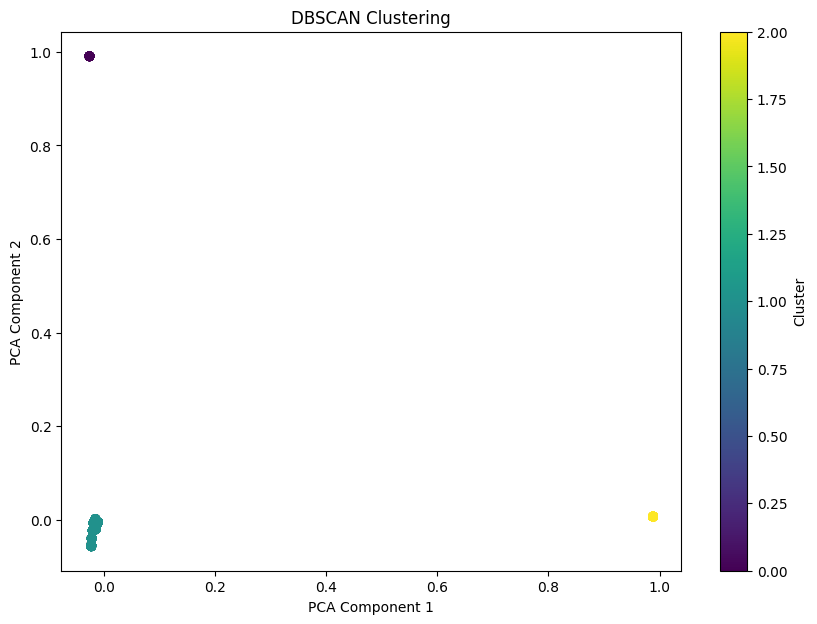

In [8]:
plt.figure(figsize=(10, 7))
plt.scatter(data['x'], data['y'], c=data['cluster'], cmap='viridis', marker='o')
plt.title('DBSCAN Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [10]:
# –í—ã–¥–µ–ª–µ–Ω–∏–µ —Å–ª–æ–≤ –ø–æ –∫–ª–∞—Å—Ç–µ—Ä–∞–º
for cluster in set(clusters):
    print(f"Cluster {cluster}:")
    cluster_texts = [lemma_df['word'][i] for i in range(len(clusters)) if clusters[i] == cluster]
    print(cluster_texts)

Cluster 0:
['—Ä–æ—Å—Å–∏—è', '—Ä–æ—Å—Å–∏—è', '—Ä–æ—Å—Å–∏—è', '—Ä–æ—Å—Å–∏—è', '—Ä–æ—Å—Å–∏—è', '—Ä–æ—Å—Å–∏—è', '—Ä–æ—Å—Å–∏—è', '—Ä–æ—Å—Å–∏—è', '—Ä–æ—Å—Å–∏—è', '—Ä–æ—Å—Å–∏—è', '—Ä–æ—Å—Å–∏—è', '—Ä–æ—Å—Å–∏—è', '—Ä–æ—Å—Å–∏—è', '—Ä–æ—Å—Å–∏—è', '—Ä–æ—Å—Å–∏—è', '—Ä–æ—Å—Å–∏—è', '—Ä–æ—Å—Å–∏—è', '—Ä–æ—Å—Å–∏—è', '—Ä–æ—Å—Å–∏—è', '—Ä–æ—Å—Å–∏—è', '—Ä–æ—Å—Å–∏—è', '—Ä–æ—Å—Å–∏—è', '—Ä–æ—Å—Å–∏—è', '—Ä–æ—Å—Å–∏—è', '—Ä–æ—Å—Å–∏—è', '—Ä–æ—Å—Å–∏—è', '—Ä–æ—Å—Å–∏—è', '—Ä–æ—Å—Å–∏—è', '—Ä–æ—Å—Å–∏—è', '—Ä–æ—Å—Å–∏—è', '—Ä–æ—Å—Å–∏—è', '—Ä–æ—Å—Å–∏—è', '—Ä–æ—Å—Å–∏—è', '—Ä–æ—Å—Å–∏—è', '—Ä–æ—Å—Å–∏—è', '—Ä–æ—Å—Å–∏—è', '—Ä–æ—Å—Å–∏—è', '—Ä–æ—Å—Å–∏—è', '—Ä–æ—Å—Å–∏—è', '—Ä–æ—Å—Å–∏—è', '—Ä–æ—Å—Å–∏—è', '—Ä–æ—Å—Å–∏—è', '—Ä–æ—Å—Å–∏—è', '—Ä–æ—Å—Å–∏—è', '—Ä–æ—Å—Å–∏—è', '—Ä–æ—Å—Å–∏—è', '—Ä–æ—Å—Å–∏—è', '—Ä–æ—Å—Å–∏—è', '—Ä–æ—Å—Å–∏—è', '—Ä–æ—Å—Å–∏—è', '—Ä–æ—Å—Å–∏—è', '—Ä–æ—Å—Å–∏—è', '—Ä–æ—Å—Å–∏—è', '—Ä–æ—Å—Å–∏—è', '—Ä–æ—Å—Å–∏—è', '—Ä–æ—Å—Å–∏—è', '—Ä–æ—Å—Å–∏—è', '—Ä–æ—Å—Å–∏—è', '—Ä–æ—Å—Å–∏—è', '—Ä–æ—Å—Å–∏—è', '—Ä–æ—Å—Å–∏—è', '—Ä–æ—Å—Å–∏—

–ü–µ—Ä–≤—ã–π –∏ —Ç—Ä–µ—Ç–∏–π –∫–ª–∞—Å—Ç–µ—Ä—ã —Å–æ—Å—Ç–æ—è—Ç –∏–∑ –º–Ω–æ–∂–µ—Å—Ç–≤–∞ –∫–æ–ø–∏–π –æ–¥–Ω–æ–≥–æ —Å–ª–æ–≤–∞: –ø–µ—Ä–≤—ã–π = "—Ä–æ—Å—Å–∏—è", —Ç—Ä–µ—Ç–∏–π = "–≥–æ–¥". –í–æ –≤—Ç–æ—Ä–æ–π –∫–ª–∞—Å—Ç–µ—Ä –≤–æ—à–ª–∏ –≤—Å–µ –æ—Å—Ç–∞–≤—à–∏–µ—Å—è —Å–ª–æ–≤–∞